In [1]:
import pickle
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.colors import LightSource
import spacy
from astropy.coordinates import cartesian_to_spherical
# For better quality video
%matplotlib widget
plt.interactive(False)
nlp=spacy.load("en_core_web_md")

2023-08-04 04:08:09.497757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-04 04:08:09.548563: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-04 04:08:09.549631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [13]:
#with open('/workspace/unitartucs-thesis-tokenMerge/coding/testpd.plk','rb') as f:
#    testpd=pickle.load(f)

#test1=testpd[:1000].copy()
#posidx=np.array(test1[test1['label']==1].index)
#negidx=np.array(test1[test1['label']==0].index)
#length=[]
#docs=nlp.pipe(test1['text'])
#for doc in docs:
#    length.append(len(doc)-6)
#test1['length']=length
with open('./first1000_testset.plk','rb') as f:
    test1=pickle.load(f)
with open('./test_totalCorpora.plk','rb') as f:
    totalCount=pickle.load(f)
with open('./test_posCorpora.plk','rb') as f:
    posCount=pickle.load(f)    
with open('./test_negCorpora.plk','rb') as f:
    negCount=pickle.load(f)  
    
for k in totalCount.keys():
    total=totalCount[k]
    neg=negCount[k]
    pos=negCount[k]
    negCount[k]=neg/total
    posCount[k]=pos/total
posidx=np.array(test1[test1['label']==1].index)
negidx=np.array(test1[test1['label']==0].index)
with open('./Master_vocab.pkl','rb') as f:
    vocab=pickle.load(f)
tok2id=vocab['tok2id']
id2tok=vocab['id2tok']
endid=tok2id['e0s']
docs=nlp.pipe(test1['text'])
negtextFreq = [ [ negCount[token.text] for token in doc if(token.is_stop==False and token.is_punct==False)] for doc in docs ] 
docs=nlp.pipe(test1['text'])
poslist = [ [ token.pos for token in doc if(token.is_stop==False and token.is_punct==False)] for doc in docs ]
for i,r in enumerate(negtextFreq):
    if len(r)<175:
        negtextFreq[i]=(r+([negCount['e0s']]*(175-len(r))))
    else:
        negtextFreq[i]=negtextFreq[i][:175]
for i,r in enumerate(poslist):
    if len(r)<175:
        poslist[i]=(r+([110]*(175-len(r))))
    else:
        poslist[i]=poslist[i][:175]

negtextFreq=np.array(negtextFreq)
poslist=np.array(poslist)
path='/home/dick/RunpodData/'
run=os.listdir(path)
for i in range(len(run)):
    name=" ".join(run[i].split("_")[:3])
    print(f'{i:2d} {name:20s}')

 0 HPC Curl RandMerge  
 1 Curl RandMerge R11  
 2 HPC Curl BaseCase   
 3 Curl skipCCONJ R17  
 4 Curl skipCCONJ R1   
 5 Curl BaseCase R14   
 6 Curl RandMerge min2Max3
 7 HPCData Curl BaseCsae
 8 HPC Curl MergeADJ   
 9 BaseCase 256dim R1  
10 Curl BaseCase R10   
11 Curl RandMerge R1   
12 Curl BaseCase R1    
13 RandMerge 256dim min2max2
14 Curl MergePROPN R13 
15 Curl RandMerge min2max3
16 Curl MergePROPN R1  


In [14]:
curdataList = glob.glob(f'{path}{run[12]}/val_curldata_*.plk')
divdataList = glob.glob(f'{path}{run[12]}/val_divdata_*.plk')
curldata={}
divdata={}
for file in curdataList:
    with open(f'{file}','rb') as f:
        try:
            tmp=pickle.load(f)
            i=list(tmp.keys())[0]
            curldata[i]=tmp[i]
        except EOFError:
            pass
for file in divdataList:
    with open(f'{file}','rb') as f:
        tmp=pickle.load(f)
        i=list(tmp.keys())[0]
        divdata[i]=tmp[i]
print(sorted(list(curldata.keys())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [15]:
epoch=431
keys=list(curldata[epoch]['forward'].keys())
print(keys)

[0, 25, 50, 75, 100, 125, 150]


In [19]:
#samplesize=min(len(negidx),len(posidx))
samplesize=200
print(samplesize)
direction='forward'
nsmpidx=np.random.choice(negidx,samplesize,replace=False)
psmpidx=np.random.choice(posidx,samplesize,replace=False)
epoch_in=curldata[epoch][direction][0][:,:25,:]
epoch_curl=curldata[epoch][direction][0][:,25:,:]
epoch_div=divdata[epoch][direction][0][:,25:,:]
negFreq=negtextFreq[:]
for k in range(1,len(keys)):
    epoch_in = np.hstack((epoch_in,curldata[epoch][direction][keys[k]][:,:25,:]))
    epoch_curl = np.hstack((epoch_curl,curldata[epoch][direction][keys[k]][:,25:,:]))
    epoch_div = np.hstack((epoch_div,divdata[epoch][direction][keys[k]][:,25:,:]))
l=np.linalg.norm(epoch_in,axis=-1)
epoch_in_unit = epoch_in/ l.reshape(1000,175,1)
l=np.linalg.norm(epoch_curl,axis=-1)
epoch_curl_unit = epoch_curl/ l.reshape(1000,175,1)

200


length=175
negcolormap = cm.viridis
colors=np.arange(100)
norm = Normalize()
norm.autoscale(colors)
nco=negcolormap(norm(colors))
fig = plt.figure(dpi=600)
curlax = fig.add_subplot(projection='3d')
ln=curlax.quiver(epochN_in[50:100,0:1,0], epochN_in[50:100,0:1,1], epochN_in[50:100,0:1,2],
              epochN_curl[50:100,0:1,0] , epochN_curl[50:100,0:1,1], epochN_curl[50:100,0:1,2] ,
              length=0.3,color=nco[0], normalize=True)
def init():
    return ln
def update(i):
    global nco
    i=int(i)
    p=np.ceil(i/test1.loc[nsmpidx]['length']*100)
    p=np.where(p>99,99,p)
    cmap=nco[p.astype(int)]
    ln=curlax.quiver(epochN_in[50:100,i:i+1,0], epochN_in[50:100,i:i+1,1], epochN_in[50:100,i:i+1,2],
              epochN_curl[50:100,i:i+1,0] , epochN_curl[50:100,i:i+1,1], epochN_curl[50:100,i:i+1,2] ,
              length=0.1, normalize=True,color=cmap)
    return ln

ani = FuncAnimation(fig, update, frames=length, init_func=init, blit=True, interval=100)
HTML(ani.to_html5_video())

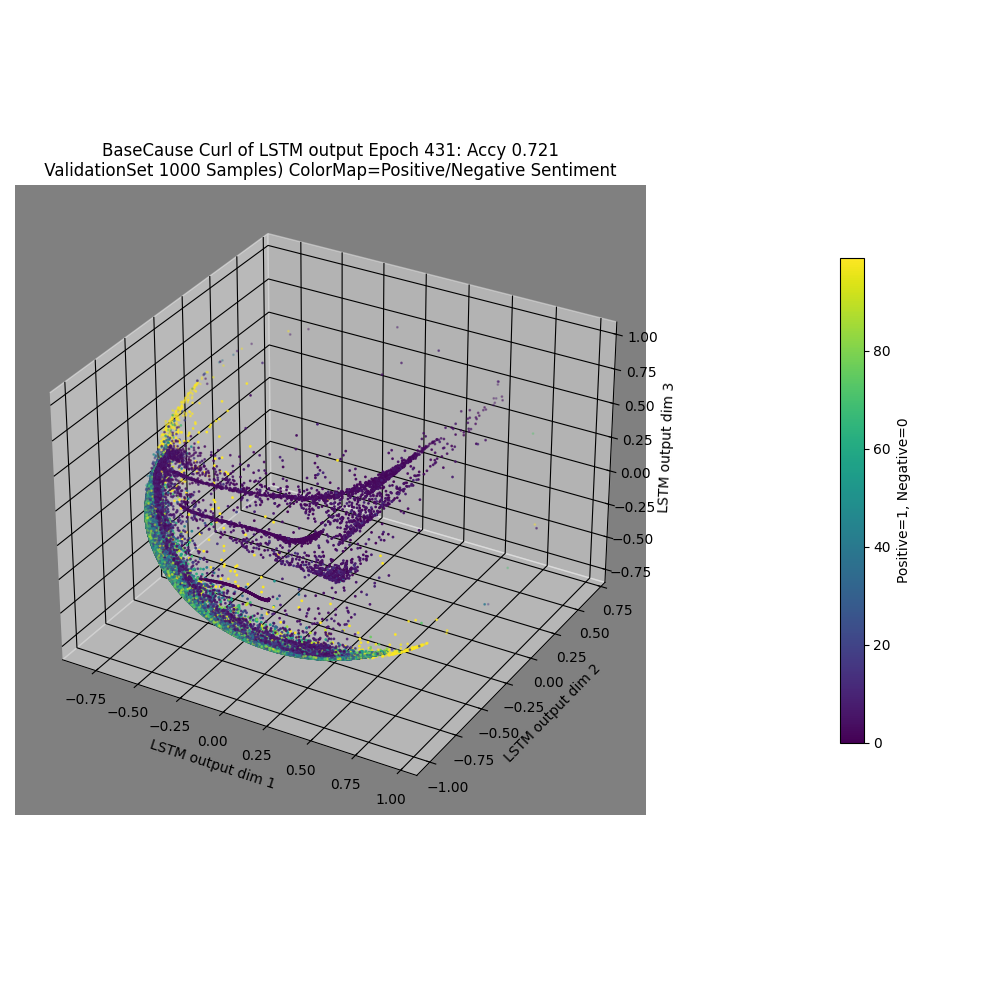

In [27]:
start,stop=0,175
plt.close('all')
plt.rcParams['grid.color'] = "black"
curlfig=plt.figure(figsize=(10,10))
sample=epoch_in_unit[:]
sample_curl=epoch_curl[:]
negcolormap = cm.viridis
colors=np.arange(100)
norm.autoscale(colors)
nco=negcolormap(norm(colors))
#colors=np.zeros((1000,175))
#colors[posidx,:]=1
#colors=np.arange(84,104)
#norm = Normalize()
#norm.autoscale(poslist)
#nco=negcolormap(norm(poslist))
#norm = Normalize()
#norm.autoscale(sample_curl[:,:,2])
#nco=negcolormap(norm(sample_curl[:,:,2]))
#norm = Normalize()
#norm.autoscale(poslist)
#nco=negcolormap(poslist)

curlax=curlfig.add_subplot(projection='3d')
for i in range(start,stop):
    keep=np.ceil((i/test1['length'])*100)
    keep=np.where(keep>=100,-1,keep)
    p = [ int(k) for k in keep if(k!=-1)]
    pos = (poslist[:,i:i+1]-84).astype(int)
    keep1=np.where(keep!=-1)[0]
    curlax.scatter(sample[keep1,i:i+1,0], sample[keep1,i:i+1,1], sample[keep1,i:i+1,2],
                 s=1,c=nco[p])
    #curlax.quiver(sample[keep,i:i+1,0], sample[keep,i:i+1,1], sample[keep,i:i+1,2],
    #               sample_curl[keep,i:i+1,0],sample_curl[keep,i:i+1,1], sample_curl[keep,i:i+1,2] ,
    #             length=0.1, normalize=True,color=nco[keep,i:i+1])
    
    #curlax.scatter3D(sample[:,i:i+1,0], sample[:,i:i+1,1], sample[:,i:i+1,2],c=nco[:,i:i+1],s=5)
    curlax.set_xlabel('LSTM output dim 1')
    curlax.set_ylabel('LSTM output dim 2')
    curlax.set_zlabel('LSTM output dim 3')
    
    curlax.set_facecolor('gray')
sm = plt.cm.ScalarMappable(cmap=negcolormap, norm=norm)
cbar=curlfig.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
cbar.set_label('Positive=1, Negative=0')
#curlax.view_init(elev=60, azim=-80)
curlax.set_title(f"BaseCause Curl of LSTM output Epoch {epoch}: Accy 0.721\n ValidationSet 1000 Samples) ColorMap=Positive/Negative Sentiment ")
plt.tight_layout()
plt.show()

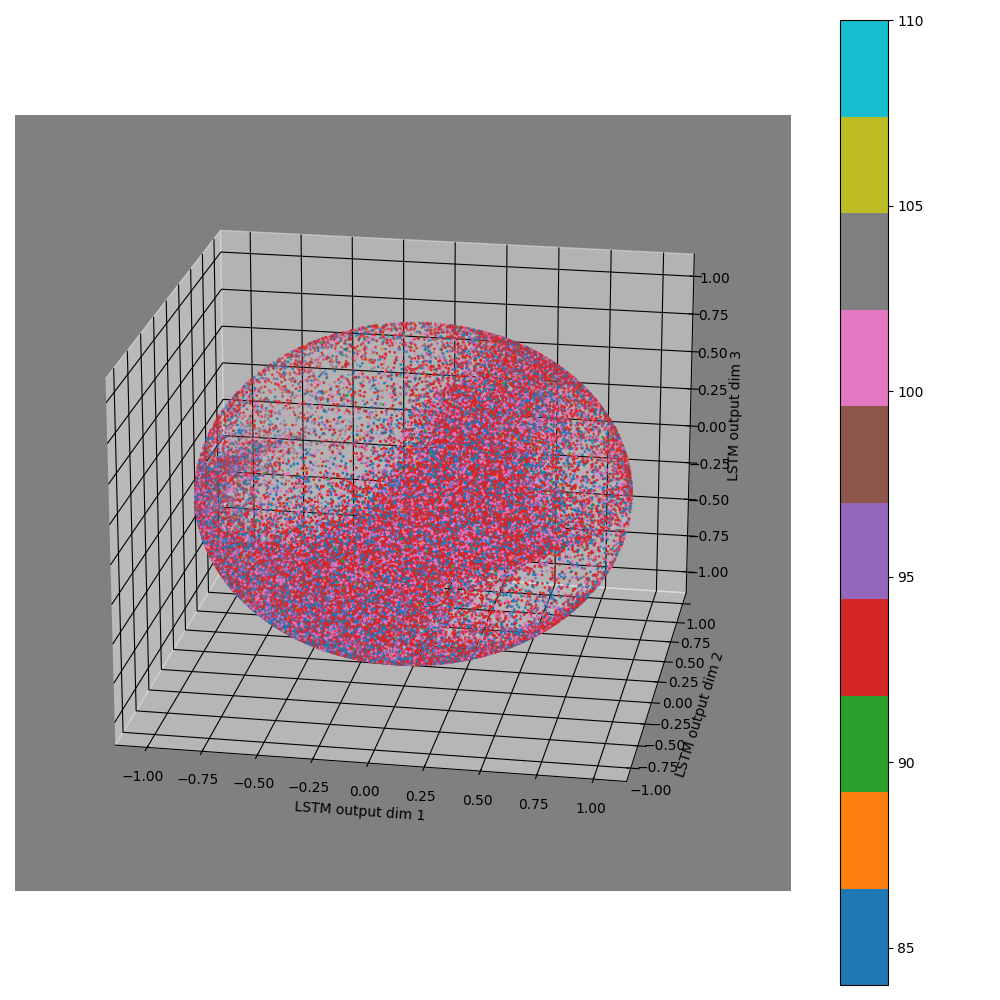

In [25]:
start,stop=5,175
negcolormap = cm.tab10
#norm = Normalize()
#norm.autoscale(negtextFreq)
#nco=negcolormap(norm(negtextFreq))
#colors=np.arange(100)
colors=np.zeros((1000,175))
colors[posidx,:]=1
norm.autoscale(poslist)
nco=negcolormap(norm(poslist))
#norm.autoscale(negtextFreq)
#nco=negcolormap(norm(negtextFreq))
plt.close('all')
plt.rcParams['grid.color'] = "black"
divfig=plt.figure(figsize=(10,10))
curlax=divfig.add_subplot(projection='3d')
#curlax2=divfig.add_subplot(1,2,2,projection='3d')
sample=epoch_in[:]
sample_curl=epoch_curl_unit[:]
#ls = LightSource(270, 90)
#rgb = ls.shade(negtextFreq, negcolormap)
curlax.set_facecolor('gray')
for i in range(start,stop):
    keep=np.ceil(i/test1['length']*100)
    keep=np.where(keep>99,-1,keep)
    p = [ int(k) for k in keep if(k!=-1)]
    keep=np.where(keep!=-1)[0]
    curlax.scatter3D(sample_curl[keep,i:i+1,0], sample_curl[keep,i:i+1,1],sample_curl[keep,i:i+1,2],s=1,c=nco[keep,i:i+1])
    curlax.set_xlabel('LSTM output dim 1')
    curlax.set_ylabel('LSTM output dim 2')
    curlax.set_zlabel('LSTM output dim 3')
#sm = plt.cm.ScalarMappable(cmap=cm.bwr, norm=norm)
#cbar=divfig.colorbar(sm,ax=curlax,shrink=0.5,pad=0.2)
sm = plt.cm.ScalarMappable(cmap=cm.tab10, norm=norm)
cbar=plt.colorbar(sm,ax=curlax)
#cbar.set_label('Negative Tokens Relative Frequence')
#curlax.set_title(f"BaseCause Curl of LSTM output Epoch {epoch}: Accy 0.71\n ValidationSet 1000 Samples) ColorMap=Negative Sentiment Token Frequence")
curlax.view_init(elev=20, azim=-80)

plt.tight_layout()
plt.show()

In [152]:
np.max(poslist)

103

In [6]:
test1

,text,label,length
0,"s0s s0s s0s s0s s0s at last, a great film that...",1,51
1,"s0s s0s s0s s0s s0s the sort of ""little"" film ...",1,130
2,s0s s0s s0s s0s s0s if you enjoy riddles and s...,1,228
3,s0s s0s s0s s0s s0s given the subject matter o...,0,297
4,"s0s s0s s0s s0s s0s in my opinion, a good docu...",0,339
...,...,...,...
995,s0s s0s s0s s0s s0s i just spent the last half...,0,325
996,s0s s0s s0s s0s s0s i really hated this movie ...,0,164
997,s0s s0s s0s s0s s0s cam archer's lyrical bobby...,1,77
998,s0s s0s s0s s0s s0s this is a wonderful comedy...,1,230
